In [293]:
import numpy as np
import pandas as pd
import math
from random import choices
import matplotlib.pyplot as plt
from sklearn import neighbors

In [277]:
data = pd.read_csv('datos.txt', sep=" ", header=None)
data.columns = ["x", "y", "error"]
data['x'] = data['x'] - data['x'].min()

In [278]:
alpha = 105
b = 15

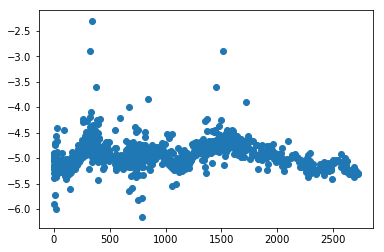

In [279]:
plt.scatter(data['x'], data['y'])
plt.show()

In [280]:
x_array = data['x'].values
x_array = [[1, x] for x in x_array]

x_array = np.array(x_array)
print(x_array)

[[  1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   9.59500000e-03]
 [  1.00000000e+00   1.93400000e-02]
 ..., 
 [  1.00000000e+00   2.70792391e+03]
 [  1.00000000e+00   2.71786712e+03]
 [  1.00000000e+00   2.72284778e+03]]


In [281]:
def get_k(x1, x2, alpha):
    return np.exp((-1/2)*((x1-x2)/alpha)**2)

In [282]:
x_random = np.random.uniform(data['x'].min(), data['x'].max(), b)
x_random

array([  352.55699009,   555.55328186,  1406.81845338,    27.86753518,
         314.20273497,   234.90011915,  2087.34230587,  2039.0650088 ,
         302.35221851,  2120.64149388,  2152.73914949,   951.96180683,
        1618.74099086,   218.15282436,  2160.04295751])

In [283]:
def get_phi(x, x_random, alpha):
    phi = list()
    for i in x:
        phi.append([1] + [get_k(i, m, alpha) for m in x_random])
        
    return np.array(phi)

In [284]:
phi = get_phi(data['x'], x_random, alpha)
phi

array([[  1.00000000e+000,   3.56344908e-003,   8.33815300e-007, ...,
          2.45700234e-052,   1.15520608e-001,   1.26817083e-092],
       [  1.00000000e+000,   3.56454260e-003,   8.34218539e-007, ...,
          2.46046615e-052,   1.15542542e-001,   1.27055707e-092],
       [  1.00000000e+000,   3.56565353e-003,   8.34628275e-007, ...,
          2.46398909e-052,   1.15564822e-001,   1.27298520e-092],
       ..., 
       [  1.00000000e+000,   5.39552250e-110,   5.68644755e-092, ...,
          4.30900612e-024,   8.05256382e-123,   1.22409044e-006],
       [  1.00000000e+000,   6.41999233e-111,   8.12553125e-093, ...,
          1.60626769e-024,   8.48773207e-124,   7.43484368e-007],
       [  1.00000000e+000,   2.20281943e-111,   3.05578954e-093, ...,
          9.76526327e-025,   2.74073056e-124,   5.77217856e-007]])

In [285]:
def get_w(array, y):
    first = (array.T).dot(array)
    inverse = np.linalg.inv(first)
    second = (array.T).dot(y)
    return inverse.dot(second)

In [286]:
w = get_w(phi, data['y'])
w

array([ -5.09963909e+00,  -5.72096893e-01,   1.51219181e-01,
         3.45155203e-01,  -2.19548963e-02,  -4.18044019e+00,
        -5.58500623e+00,  -4.52751290e+00,   2.05345663e+00,
         7.13345789e+00,  -1.11672680e+00,   2.39590041e+01,
         2.10326088e-01,   3.92991119e-01,   3.51079546e+00,
        -2.02317214e+01])

In [287]:
random_x = np.linspace(0, data['x'].max(), 1000)
print(len(random_x))
new_phi = get_phi(random_x, x_random, alpha)

1000


In [288]:
new_y = (new_phi).dot(w)
print(len(new_y))

1000


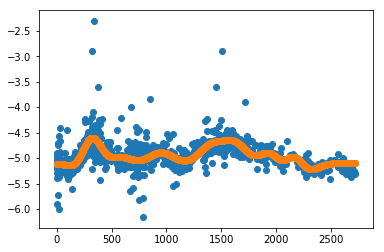

In [289]:
plt.scatter(data['x'], data['y'])
plt.scatter(random_x, new_y)
plt.show()

In [306]:
x = data['x']
x.reshape(-1, 1)
print(X)
T = np.linspace(0, data['x'].max(), 1000)[:, np.newaxis]
print(T)
y = data['y']
print(len(y))



# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

0          0.000000
1          0.009595
2          0.019340
3          0.980787
4          0.990278
5          1.000220
6          2.005764
7          2.015428
8          2.025405
9          2.987211
10         3.013900
11         5.108542
12         5.179282
13         5.978866
14         6.107350
15         6.182546
16         8.982350
17         9.173831
18        10.091956
19        10.953507
20        11.038125
21        11.161806
22        12.093634
23        12.128877
24        13.044583
25        13.086817
26        17.964097
27        18.063715
28        18.156204
29        18.980926
           ...     
1192    2585.124433
1193    2588.115428
1194    2591.049549
1195    2597.984977
1196    2601.000937
1197    2607.989711
1198    2610.115775
1199    2612.091123
1200    2616.951898
1201    2620.068623
1202    2626.930799
1203    2638.887859
1204    2640.059699
1205    2644.996435
1206    2647.902384
1207    2649.046620
1208    2654.880451
1209    2656.013090
1210    2660.786238


/Users/EnriqueOlivares/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/EnriqueOlivares/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1222]